## Anomaly Detection
- It is basically to detect the outliers
- In some cases, where the outliers plays an important role in the dataset, like in a dataset outlier is having cancer so that outlier is important, in such cases we use Anomaly Detection
- The outlier detected by using Anomaly detection will play a very important role
- Anomaly Detection is based on unsupervised learning

### Types of Anomaly Detection
- Isolation Forest [internally uses Decision Tree - Isolated Tree]
- DBSCAN Clustering 
- Local Outlier Factor

#### Isolation Forest
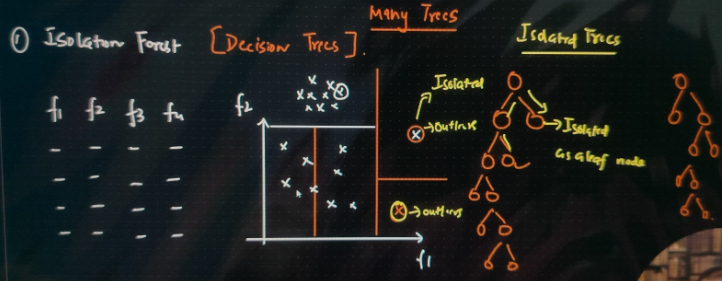

- Even though it's unsupervised learning, but for some specific purpose internally it's using Decision Tree
- For each and every data point, will split upto to a leaf node, no matter how many numbers of split it's making to get the leaf mode
- will be not dependent on one decision tree, as the feature increases will try with different different trees, will be having many decision trees and for every tree depth path may be different based on the feature
- The more easily will be getting the leaf node for any point means it is becoming isloated from other point more easily, that will be an outlier
- For each point, will calculate the Anomaly score and if passes the some specific thershold will conside that as an outlier
- the difference between decision tree and isolation tree is in isolation tree we are going in the depth of each node and isolating, we are isloating each and every data point separately

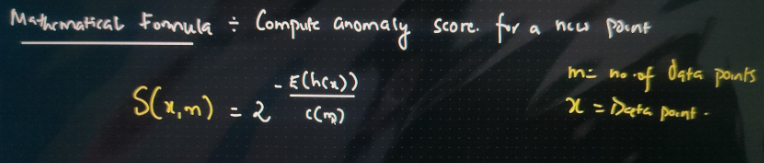

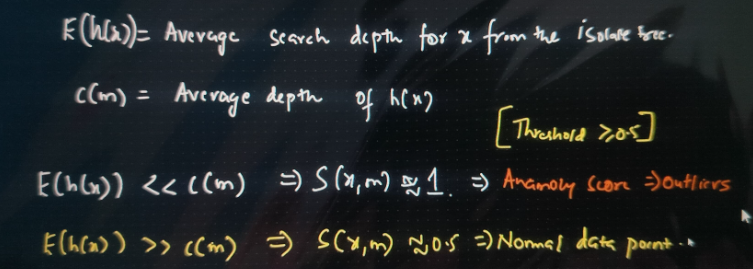

##### Practical Of Isolation Forest

In [ ]:
import pandas as pd
df=pd.read_csv('')
df.head()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

here contamination is basically a threshold value so if the isolation score is above the contamination value then it will considered as an outlier

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.2)
clf.fit(df)
pred=clf.predict(df)

will get 1's and -1's, so getting the index where the prediction value is less than 0

In [ ]:
import numpy as np
index=np.where(pred<0)

In [ ]:
x=df.values

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1], edgecolors='r')

#### DBSCAN Clustering
- the most important factor about dbscan clustering is that it is able to create cluster or group in non-linear separable data
- in dbscan clustering, we are getting the outliers based on the minPts and ε

##### Practical of DBSCAN Clustering Anomaly detection

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
%matplotlib inline

will getting both X and y but will not using y which is output feature, and using dbscan will be making the clusters

In [ ]:
X,y=make_circles(n_samples=750,factor=0.3,noise=0.1)

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
dbscan=DBSCAN(eps=0.10)
dbscan.fit_predict(X)
print(dbscan.labels_)

cluster created using dbscan

In [ ]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

cluster based on the y output feature - actual data

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

### Local Outlier Factor (LOF)
- Internally it uses **"K Nearest Neighbour concept"**, and using K nearest neighbour, they try to determine "**Local Density"**
- If the average distance is less means density is more, and if the density is less which means that point is considered as local outlier
Two immportant terms:
- **Local Outlier:** the outlier which is very much near to any cluster, other anomaly detection technique will not able to find out the local outlier
- **Global Outlier:** the outlier which is far from any cluster as completely different, so finding global outlier is easy in any anomaly detection technique

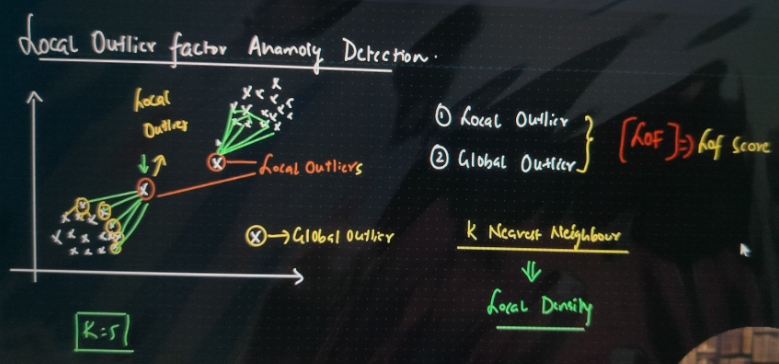

##### Practical of LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor